# Predicting NBA Game Outcomes with Machine Learning - Notebook 2
Ishan Sheth, Independent Study, Fall 2021

In notebook 2 of the project, I continued to manipulate my data tables, creating my moving averages for each game. I also created some histograms to visualize some of my data and see any trends. Since this notebook consisted of data collection and modification, it is still part of Part 1 of the project, referenced in the last notebook.

### 1.5 - Import Libraries and nba_api
Here, I imported the Python libraries that I will use for this notebook. Pandas, Numpy, Matplotlib, and Seaborn are all common libraries used for data science while nba_api and requests will allow me to get the data that I need.

In [1]:
import nba_api as nba
import pandas as pd
import numpy as np
import requests
import seaborn as sn
import matplotlib.pyplot as plt

### 1.6 - Read in the Data from the Previous Notebook and Make Some Minor Data Modifications

In [2]:
df = pd.read_csv('big_df.csv')
df.head()

,level_0,index,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0,3,22018,1610612738,BOS,Boston Celtics,21800001,2018-10-16,BOS vs. PHI,1,...,14.3,0.490,0.509,1.0,0.198,106.64,105.5,87.92,105,0.595
1,1,2,22018,1610612755,PHI,Philadelphia 76ers,21800001,2018-10-16,PHI @ BOS,0,...,15.1,0.420,0.448,1.0,0.200,106.64,105.5,87.92,106,0.405
2,2,1,22018,1610612744,GSW,Golden State Warriors,21800002,2018-10-16,GSW vs. OKC,1,...,20.4,0.479,0.525,1.0,0.199,106.60,103.0,85.83,103,0.582
3,3,0,22018,1610612760,OKC,Oklahoma City Thunder,21800002,2018-10-16,OKC @ GSW,0,...,14.6,0.418,0.466,1.0,0.200,106.60,103.0,85.83,103,0.418
4,4,22,22018,1610612766,CHA,Charlotte Hornets,21800003,2018-10-17,CHA vs. MIL,0,...,10.6,0.533,0.551,1.0,0.199,103.74,103.5,86.25,104,0.473


Here, I am changing the matchup category to display whether or not a team was the home team (1) or the away team (0)

In [5]:
substring = '@'
substring2 = 'vs.'
for part in df['MATCHUP']:
    if substring in part:
        df = df.replace(to_replace = part,
                 value ="0")
    if substring2 in part:
        df = df.replace(to_replace = part, value = '1')
df.head()

,level_0,index,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0,3,22018,1610612738,BOS,Boston Celtics,21800001,2018-10-16,1,1,...,14.3,0.490,0.509,1.0,0.198,106.64,105.5,87.92,105,0.595
1,1,2,22018,1610612755,PHI,Philadelphia 76ers,21800001,2018-10-16,0,0,...,15.1,0.420,0.448,1.0,0.200,106.64,105.5,87.92,106,0.405
2,2,1,22018,1610612744,GSW,Golden State Warriors,21800002,2018-10-16,1,1,...,20.4,0.479,0.525,1.0,0.199,106.60,103.0,85.83,103,0.582
3,3,0,22018,1610612760,OKC,Oklahoma City Thunder,21800002,2018-10-16,0,0,...,14.6,0.418,0.466,1.0,0.200,106.60,103.0,85.83,103,0.418
4,4,22,22018,1610612766,CHA,Charlotte Hornets,21800003,2018-10-17,1,0,...,10.6,0.533,0.551,1.0,0.199,103.74,103.5,86.25,104,0.473


In [6]:
df['MATCHUP'] = pd.to_numeric(df['MATCHUP'])
df.head()

,level_0,index,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0,3,22018,1610612738,BOS,Boston Celtics,21800001,2018-10-16,1,1,...,14.3,0.490,0.509,1.0,0.198,106.64,105.5,87.92,105,0.595
1,1,2,22018,1610612755,PHI,Philadelphia 76ers,21800001,2018-10-16,0,0,...,15.1,0.420,0.448,1.0,0.200,106.64,105.5,87.92,106,0.405
2,2,1,22018,1610612744,GSW,Golden State Warriors,21800002,2018-10-16,1,1,...,20.4,0.479,0.525,1.0,0.199,106.60,103.0,85.83,103,0.582
3,3,0,22018,1610612760,OKC,Oklahoma City Thunder,21800002,2018-10-16,0,0,...,14.6,0.418,0.466,1.0,0.200,106.60,103.0,85.83,103,0.418
4,4,22,22018,1610612766,CHA,Charlotte Hornets,21800003,2018-10-17,1,0,...,10.6,0.533,0.551,1.0,0.199,103.74,103.5,86.25,104,0.473


In [7]:
df = df.sort_values(['TEAM_NAME', 'GAME_DATE'])
df.head()

## Get average stats for last 8 games leading up to a game, if not last 8 then the last n games before the 8th

,level_0,index,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
12,12,7,22018,1610612737,ATL,Atlanta Hawks,21800007,2018-10-17,0,0,...,21.2,0.511,0.546,1.0,0.200,116.78,112.5,93.75,113,0.405
38,38,47,22018,1610612737,ATL,Atlanta Hawks,21800020,2018-10-19,0,0,...,17.9,0.578,0.592,1.0,0.200,108.38,106.5,88.75,106,0.418
70,70,72,22018,1610612737,ATL,Atlanta Hawks,21800036,2018-10-21,0,1,...,11.3,0.602,0.625,1.0,0.196,108.76,105.5,87.92,106,0.618
102,102,119,22018,1610612737,ATL,Atlanta Hawks,21800052,2018-10-24,1,1,...,13.6,0.489,0.530,1.0,0.202,110.04,111.0,92.50,110,0.534
150,150,158,22018,1610612737,ATL,Atlanta Hawks,21800076,2018-10-27,1,0,...,20.8,0.393,0.452,1.0,0.200,105.08,107.0,89.17,106,0.410


Here, I am dropping some columns that I do not need. It is always good to eliminate as many unnessecary columns as possible to make the data easier for the computer to read.

In [8]:
 df2 = df.drop(['index', 'level_0',
'TEAM_ID',
'TEAM_ABBREVIATION',
'GAME_ID', 'VIDEO_AVAILABLE', 'PLUS_MINUS'], axis=1)

In [549]:
df2.head()

,SEASON_ID,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,level_0.1,index.1,GAME_ID.1,TEAM_ID.1,TEAM_NAME.1,TEAM_ABBREVIATION.1,TEAM_CITY,MIN.1,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
12,22018,Atlanta Hawks,2018-10-17,0,0,240,41,90,0.456,10,36,0.278,15,18,0.833,7,38,45,19,7,3,24,30,107,20,21,21800007,1610612737,Hawks,ATL,Atlanta,240:00,93.1,94.7,106.2,112.5,-13.1,-17.8,0.463,0.79,13.5,0.235,0.690,0.477,20.884,21.2,0.511,0.546,1.0,0.200,116.78,112.5,93.75,113,0.405
38,22018,Atlanta Hawks,2018-10-19,0,0,240,41,83,0.494,14,30,0.467,21,36,0.583,11,29,40,27,9,5,19,31,117,46,47,21800020,1610612737,Hawks,ATL,Atlanta,240:00,109.5,110.4,119.2,122.4,-9.7,-12.1,0.659,1.42,18.6,0.250,0.721,0.473,17.784,17.9,0.578,0.592,1.0,0.200,108.38,106.5,88.75,106,0.418
70,22018,Atlanta Hawks,2018-10-21,0,1,240,48,98,0.490,22,47,0.468,15,19,0.789,9,35,44,32,9,7,12,21,133,78,79,21800036,1610612737,Hawks,ATL,Atlanta,240:00,121.6,125.5,102.6,105.7,19.0,19.8,0.667,2.67,21.3,0.275,0.655,0.472,10.973,11.3,0.602,0.625,1.0,0.196,108.76,105.5,87.92,106,0.618
102,22018,Atlanta Hawks,2018-10-24,1,1,240,37,91,0.407,15,38,0.395,22,31,0.710,10,44,54,28,6,6,15,26,111,110,111,21800052,1610612737,Hawks,ATL,Atlanta,240:00,101.2,100.9,94.2,92.9,7.1,8.1,0.757,1.87,19.0,0.196,0.797,0.504,13.681,13.6,0.489,0.530,1.0,0.202,110.04,111.0,92.50,110,0.534
150,22018,Atlanta Hawks,2018-10-27,1,0,240,27,84,0.321,12,40,0.300,19,23,0.826,11,37,48,20,9,8,22,13,85,158,159,21800076,1610612737,Hawks,ATL,Atlanta,240:00,80.9,80.2,92.3,89.8,-11.5,-9.6,0.741,0.91,14.7,0.190,0.792,0.462,20.928,20.8,0.393,0.452,1.0,0.200,105.08,107.0,89.17,106,0.410


In [551]:
df2['GAME_DATE'] = pd.to_datetime(df2['GAME_DATE'])
df2.head()

,SEASON_ID,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,level_0.1,index.1,GAME_ID.1,TEAM_ID.1,TEAM_NAME.1,TEAM_ABBREVIATION.1,TEAM_CITY,MIN.1,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
12,22018,Atlanta Hawks,2018-10-17,0,0,240,41,90,0.456,10,36,0.278,15,18,0.833,7,38,45,19,7,3,24,30,107,20,21,21800007,1610612737,Hawks,ATL,Atlanta,240:00,93.1,94.7,106.2,112.5,-13.1,-17.8,0.463,0.79,13.5,0.235,0.690,0.477,20.884,21.2,0.511,0.546,1.0,0.200,116.78,112.5,93.75,113,0.405
38,22018,Atlanta Hawks,2018-10-19,0,0,240,41,83,0.494,14,30,0.467,21,36,0.583,11,29,40,27,9,5,19,31,117,46,47,21800020,1610612737,Hawks,ATL,Atlanta,240:00,109.5,110.4,119.2,122.4,-9.7,-12.1,0.659,1.42,18.6,0.250,0.721,0.473,17.784,17.9,0.578,0.592,1.0,0.200,108.38,106.5,88.75,106,0.418
70,22018,Atlanta Hawks,2018-10-21,0,1,240,48,98,0.490,22,47,0.468,15,19,0.789,9,35,44,32,9,7,12,21,133,78,79,21800036,1610612737,Hawks,ATL,Atlanta,240:00,121.6,125.5,102.6,105.7,19.0,19.8,0.667,2.67,21.3,0.275,0.655,0.472,10.973,11.3,0.602,0.625,1.0,0.196,108.76,105.5,87.92,106,0.618
102,22018,Atlanta Hawks,2018-10-24,1,1,240,37,91,0.407,15,38,0.395,22,31,0.710,10,44,54,28,6,6,15,26,111,110,111,21800052,1610612737,Hawks,ATL,Atlanta,240:00,101.2,100.9,94.2,92.9,7.1,8.1,0.757,1.87,19.0,0.196,0.797,0.504,13.681,13.6,0.489,0.530,1.0,0.202,110.04,111.0,92.50,110,0.534
150,22018,Atlanta Hawks,2018-10-27,1,0,240,27,84,0.321,12,40,0.300,19,23,0.826,11,37,48,20,9,8,22,13,85,158,159,21800076,1610612737,Hawks,ATL,Atlanta,240:00,80.9,80.2,92.3,89.8,-11.5,-9.6,0.741,0.91,14.7,0.190,0.792,0.462,20.928,20.8,0.393,0.452,1.0,0.200,105.08,107.0,89.17,106,0.410


In this section, I plotted a histogram for each column. This way, I could see the distribution of each column and spot any potential outliers.

/Users/ishansheth/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


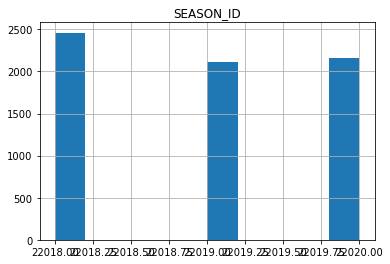

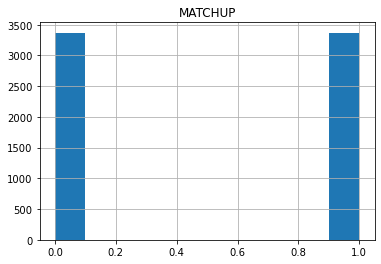

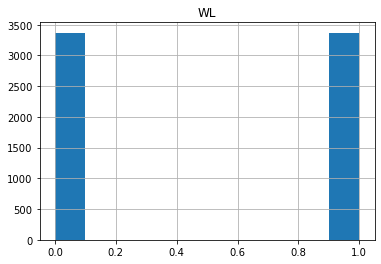

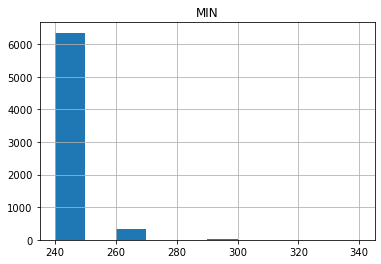

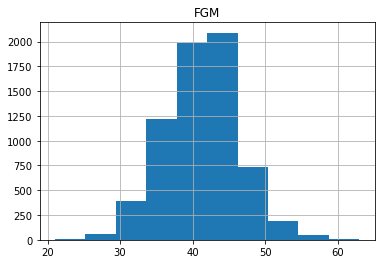

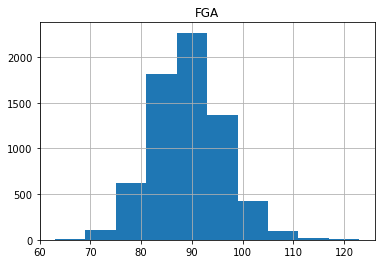

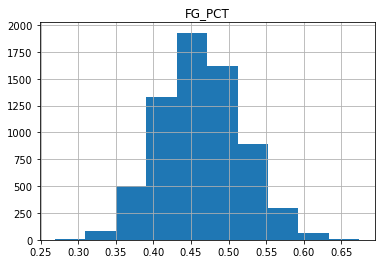

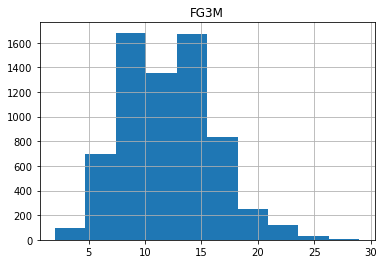

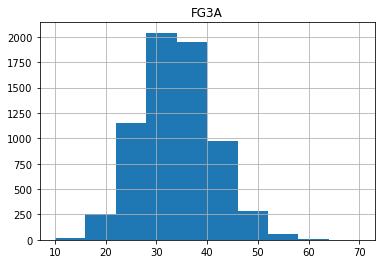

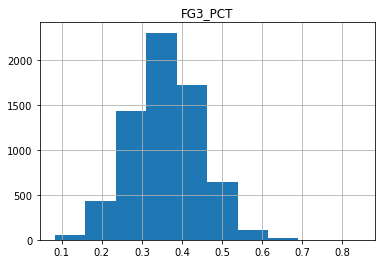

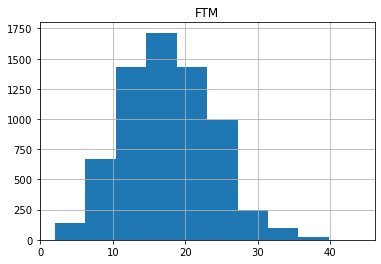

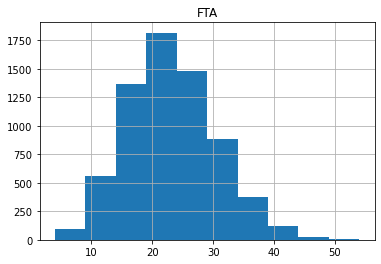

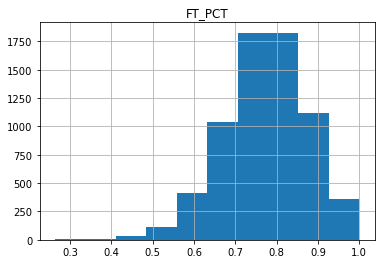

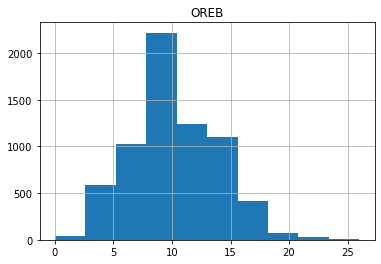

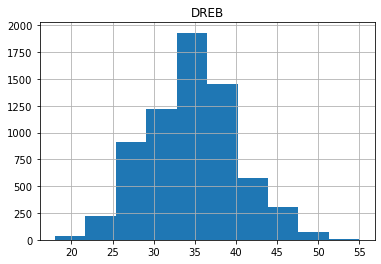

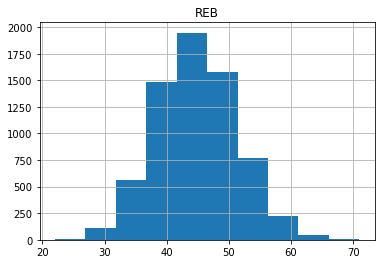

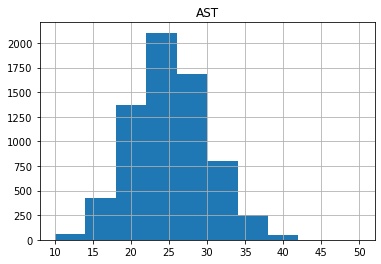

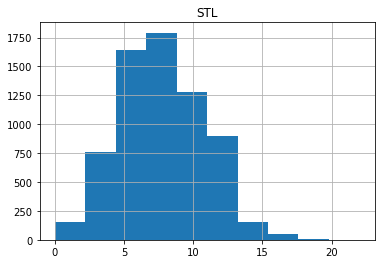

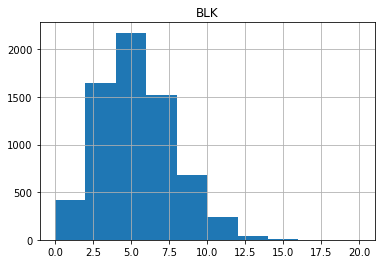

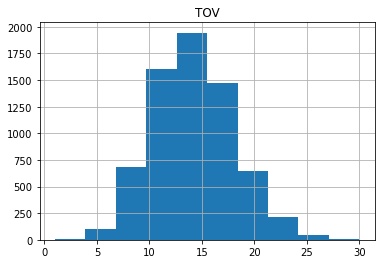

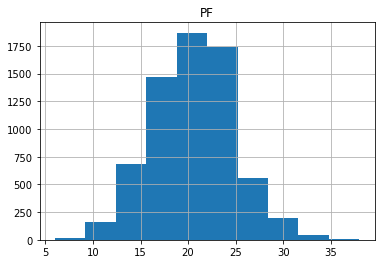

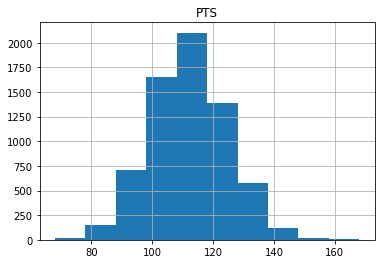

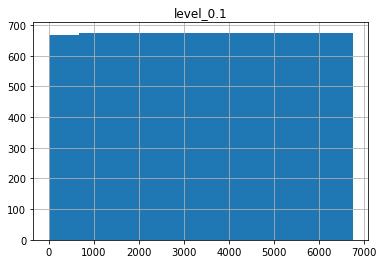

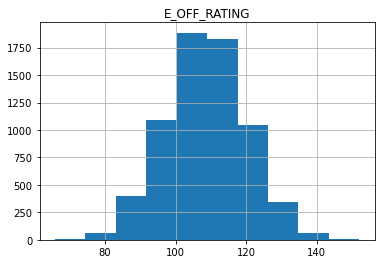

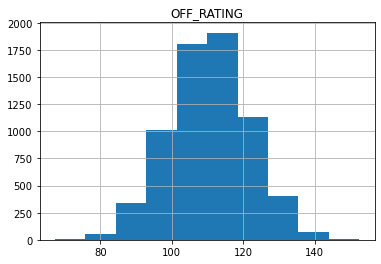

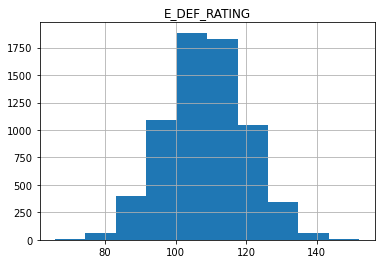

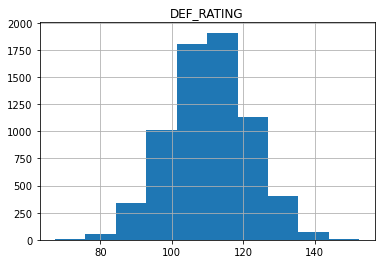

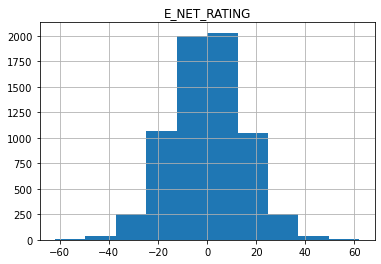

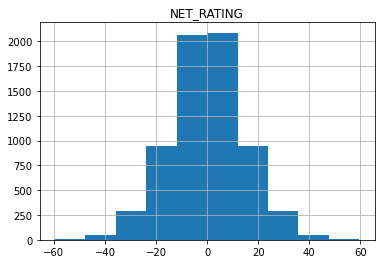

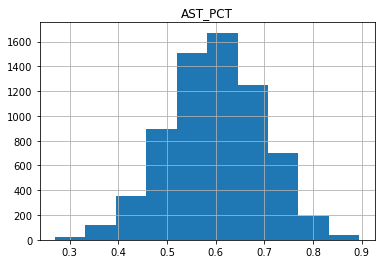

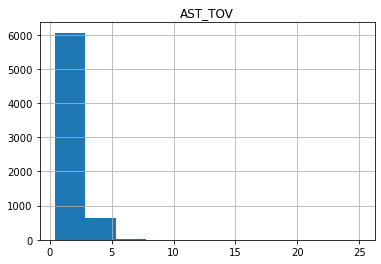

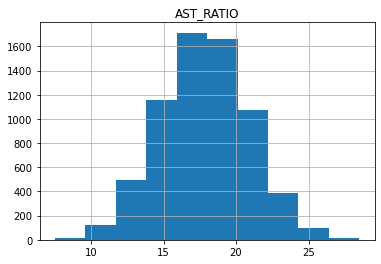

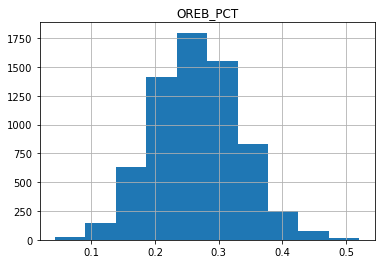

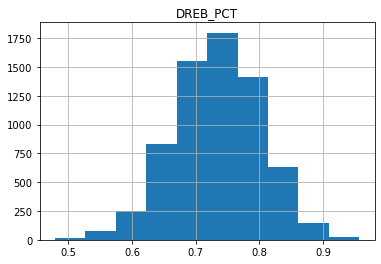

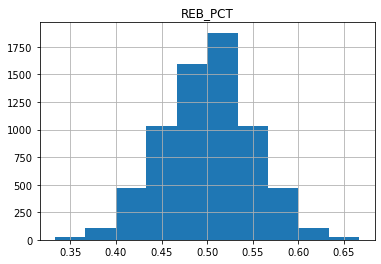

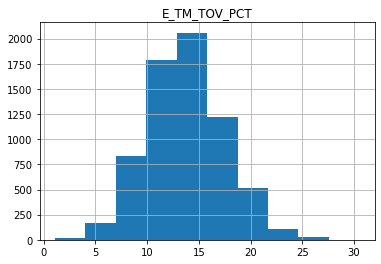

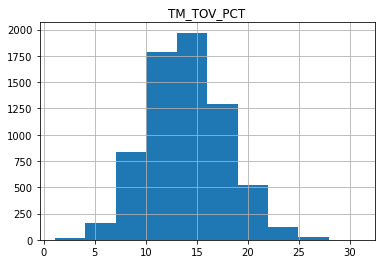

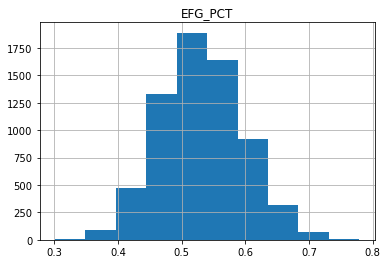

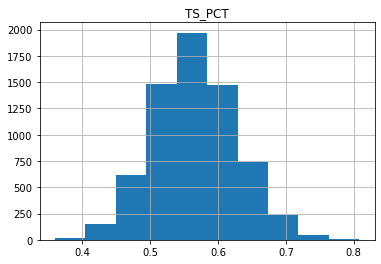

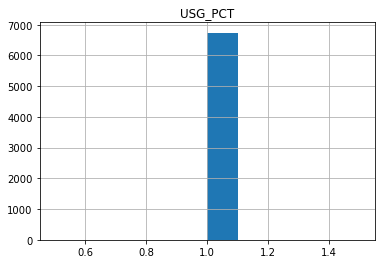

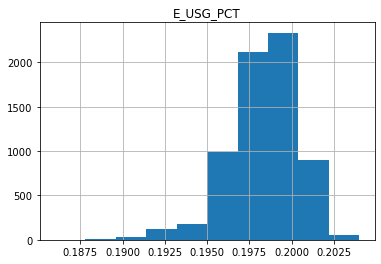

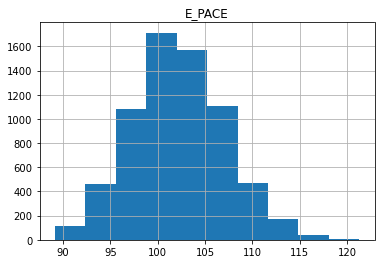

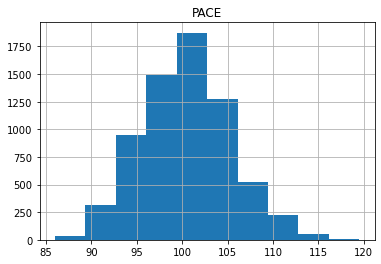

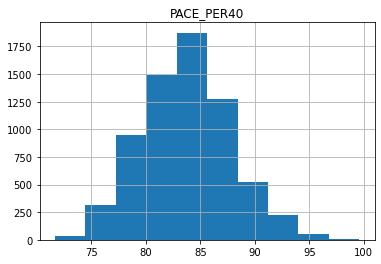

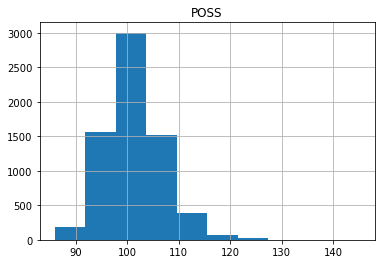

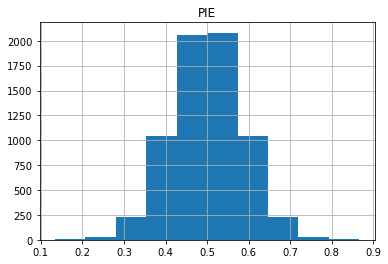

In [552]:
df3 = df2.drop(['TEAM_NAME', 'GAME_DATE', 'index.1', 'index.1',
'GAME_ID.1',
'TEAM_ID.1',
'TEAM_NAME.1',
'TEAM_ABBREVIATION.1',
'TEAM_CITY', 'MIN.1'], axis=1)
for cols in df3.columns:
    df2.hist(column=str(cols))

In [553]:
for cols in df3.columns:
    print(cols)

SEASON_ID
MATCHUP
WL
MIN
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
STL
BLK
TOV
PF
PTS
level_0.1
E_OFF_RATING
OFF_RATING
E_DEF_RATING
DEF_RATING
E_NET_RATING
NET_RATING
AST_PCT
AST_TOV
AST_RATIO
OREB_PCT
DREB_PCT
REB_PCT
E_TM_TOV_PCT
TM_TOV_PCT
EFG_PCT
TS_PCT
USG_PCT
E_USG_PCT
E_PACE
PACE
PACE_PER40
POSS
PIE


In [554]:
df3.head()

,SEASON_ID,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,level_0.1,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
12,22018,0,0,240,41,90,0.456,10,36,0.278,15,18,0.833,7,38,45,19,7,3,24,30,107,20,93.1,94.7,106.2,112.5,-13.1,-17.8,0.463,0.79,13.5,0.235,0.690,0.477,20.884,21.2,0.511,0.546,1.0,0.200,116.78,112.5,93.75,113,0.405
38,22018,0,0,240,41,83,0.494,14,30,0.467,21,36,0.583,11,29,40,27,9,5,19,31,117,46,109.5,110.4,119.2,122.4,-9.7,-12.1,0.659,1.42,18.6,0.250,0.721,0.473,17.784,17.9,0.578,0.592,1.0,0.200,108.38,106.5,88.75,106,0.418
70,22018,0,1,240,48,98,0.490,22,47,0.468,15,19,0.789,9,35,44,32,9,7,12,21,133,78,121.6,125.5,102.6,105.7,19.0,19.8,0.667,2.67,21.3,0.275,0.655,0.472,10.973,11.3,0.602,0.625,1.0,0.196,108.76,105.5,87.92,106,0.618
102,22018,1,1,240,37,91,0.407,15,38,0.395,22,31,0.710,10,44,54,28,6,6,15,26,111,110,101.2,100.9,94.2,92.9,7.1,8.1,0.757,1.87,19.0,0.196,0.797,0.504,13.681,13.6,0.489,0.530,1.0,0.202,110.04,111.0,92.50,110,0.534
150,22018,1,0,240,27,84,0.321,12,40,0.300,19,23,0.826,11,37,48,20,9,8,22,13,85,158,80.9,80.2,92.3,89.8,-11.5,-9.6,0.741,0.91,14.7,0.190,0.792,0.462,20.928,20.8,0.393,0.452,1.0,0.200,105.08,107.0,89.17,106,0.410


/Users/ishansheth/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


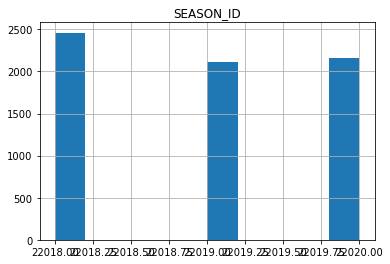

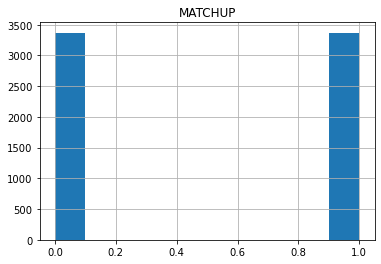

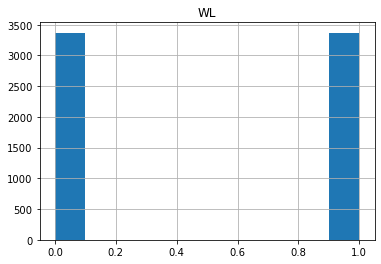

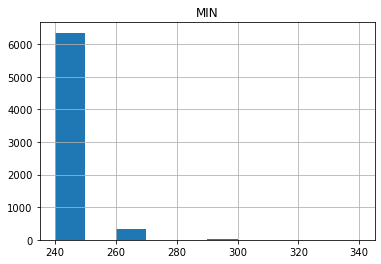

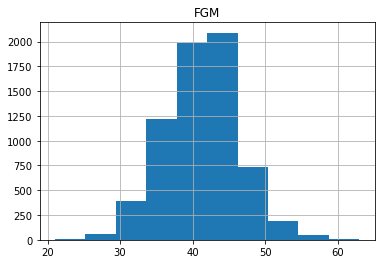

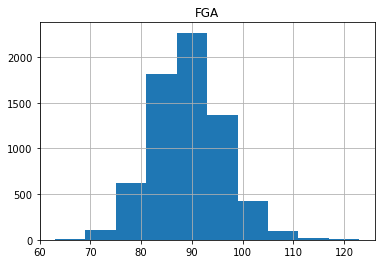

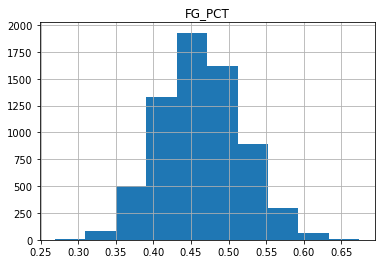

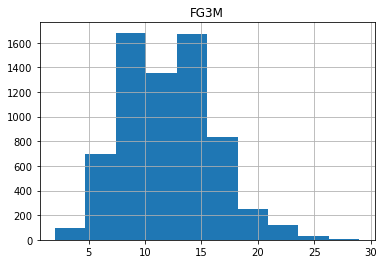

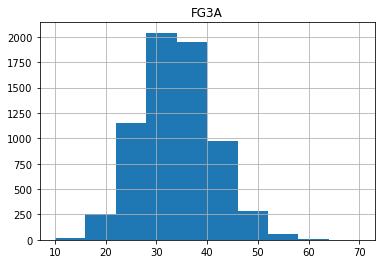

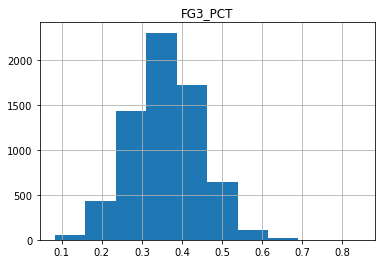

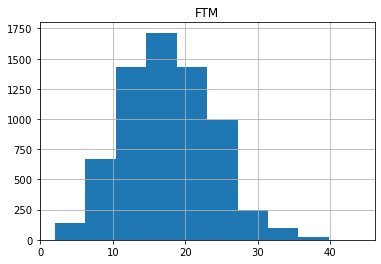

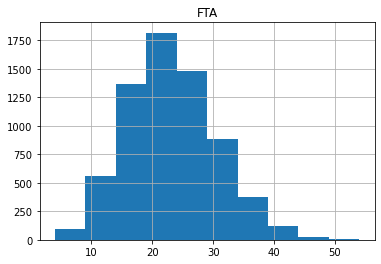

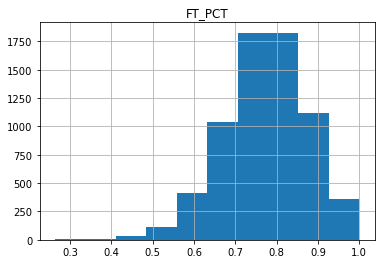

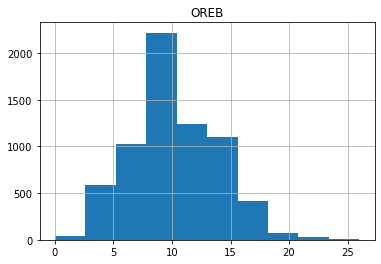

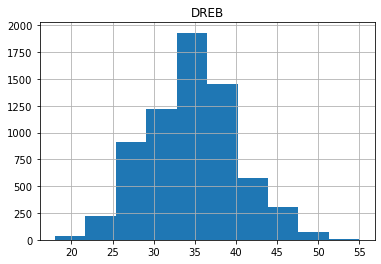

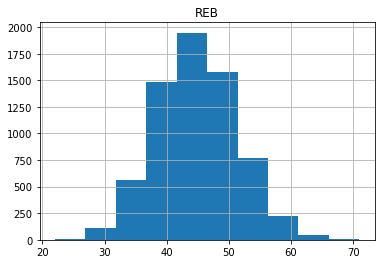

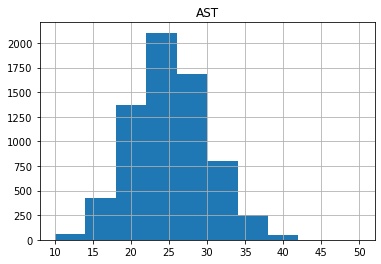

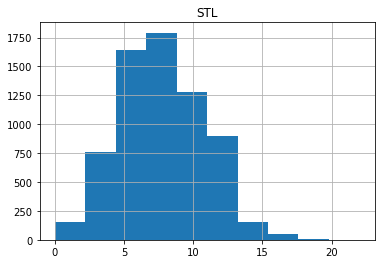

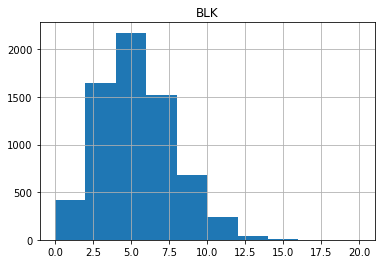

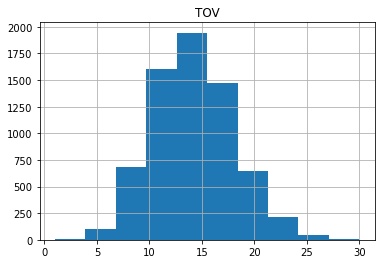

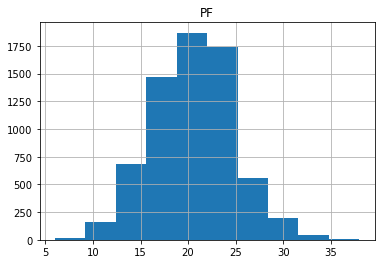

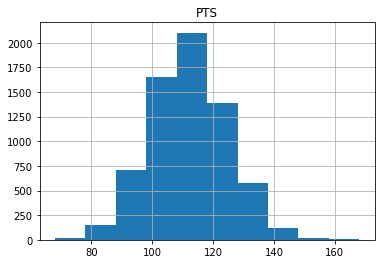

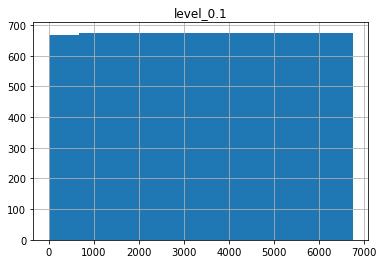

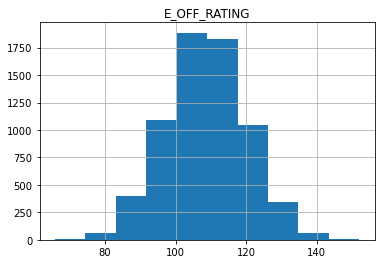

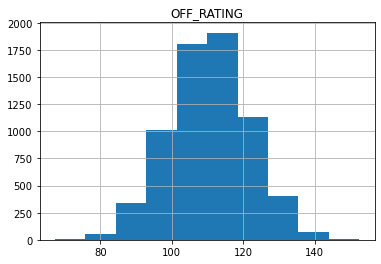

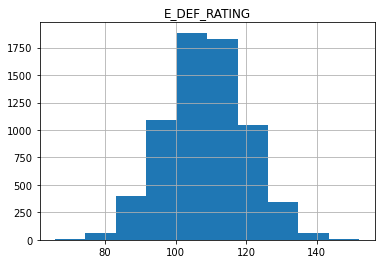

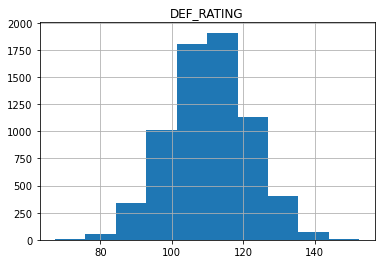

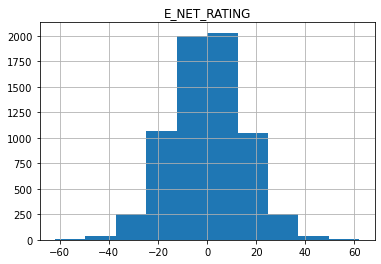

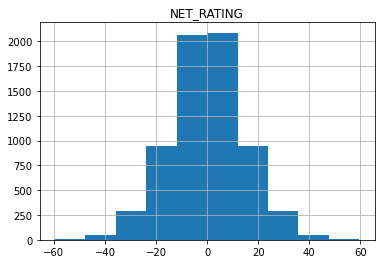

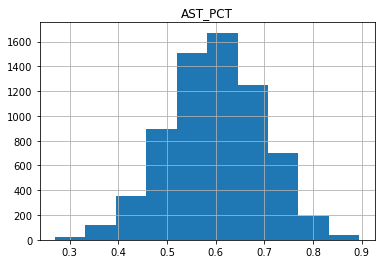

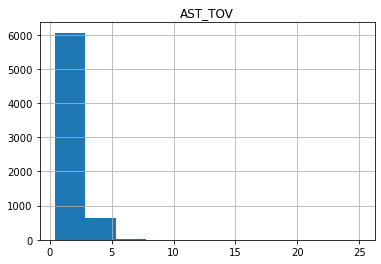

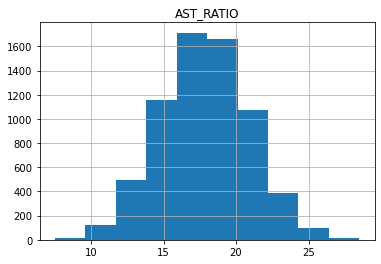

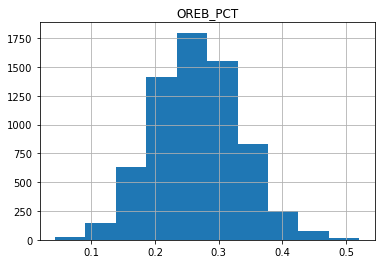

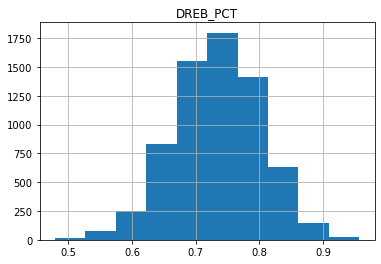

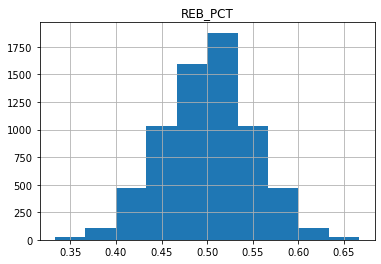

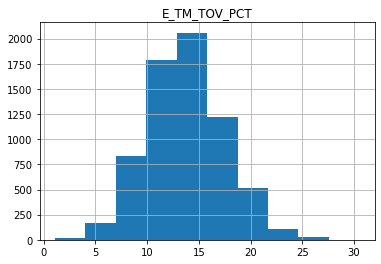

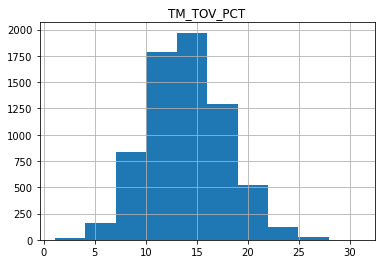

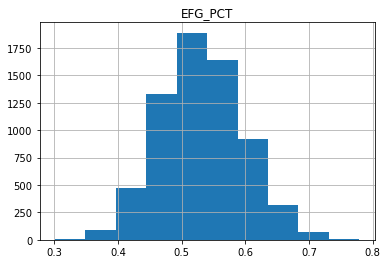

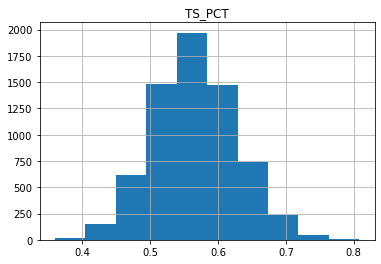

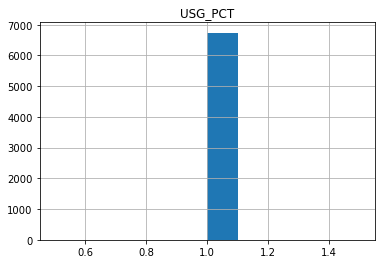

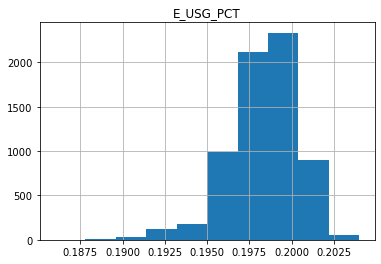

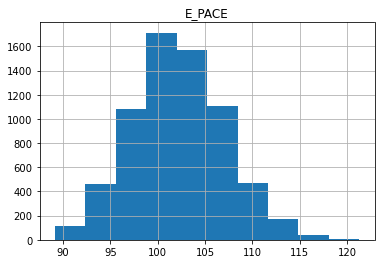

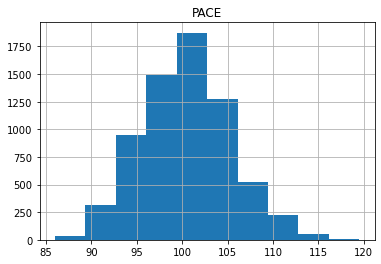

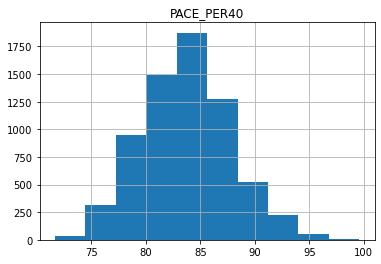

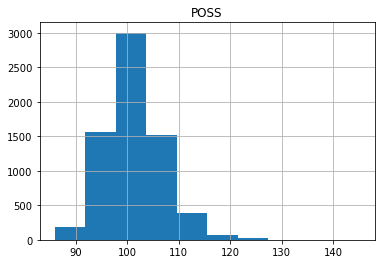

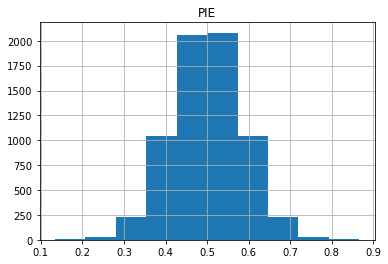

In [555]:
for cols in df3.columns:
    df3.hist(column=str(cols))

### 1.7 - Create Program to get the 7 Game Average for Each Team
For each game, this function will take the average stats of the last 7 games entering that game. This gives a good estimate of a team's performance entering each game. The first 7 games of the season were eliminated for each team because I could not calculate the 7 game average.

In [556]:
team_list = []
team_list2 = []
for games in df2['TEAM_NAME']:
    team_list.append(games)
    for i in team_list:
        if i not in team_list2:
            team_list2.append(i)
print(team_list2)

['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers', 'LA Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']


In [557]:
season_list = []
season_list2 = []
for games in df2['SEASON_ID']:
    season_list.append(games)
    for i in season_list:
        if i not in season_list2:
            season_list2.append(i)
print(season_list2)

[22018, 22019, 22020]


In [9]:
df2 = df2.sort_values(['SEASON_ID', 'TEAM_NAME'])
pd.set_option('display.max_rows', None)
df2.head()

,SEASON_ID,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
12,22018,Atlanta Hawks,2018-10-17,0,0,240,41,90,0.456,10,...,21.2,0.511,0.546,1.0,0.200,116.78,112.5,93.75,113,0.405
38,22018,Atlanta Hawks,2018-10-19,0,0,240,41,83,0.494,14,...,17.9,0.578,0.592,1.0,0.200,108.38,106.5,88.75,106,0.418
70,22018,Atlanta Hawks,2018-10-21,0,1,240,48,98,0.490,22,...,11.3,0.602,0.625,1.0,0.196,108.76,105.5,87.92,106,0.618
102,22018,Atlanta Hawks,2018-10-24,1,1,240,37,91,0.407,15,...,13.6,0.489,0.530,1.0,0.202,110.04,111.0,92.50,110,0.534
150,22018,Atlanta Hawks,2018-10-27,1,0,240,27,84,0.321,12,...,20.8,0.393,0.452,1.0,0.200,105.08,107.0,89.17,106,0.410


In [569]:
grouped = df2.groupby(df2.SEASON_ID)
new_group = grouped.get_group(22018)

In [1]:
grouped2 = df2.groupby(df2.SEASON_ID)
final = pd.DataFrame()
for seasons in season_list2:
    new_season = grouped2.get_group(seasons)
    for teams in team_list2:
        grouped = new_season.groupby(new_season.TEAM_NAME)
        Hawks = grouped.get_group(teams)
        Hawks = Hawks.reset_index()
        Hawks = Hawks.drop(['index'], axis=1)
        Hawks = Hawks.reset_index()
        Hawks = Hawks.astype({"index": int})
        Hawks2 = Hawks.drop(['TEAM_NAME', 'GAME_DATE', 'TEAM_NAME.1', 'TEAM_ABBREVIATION.1', 'TEAM_CITY', 'MIN.1'], axis=1)
        parts = Hawks2.columns
        newlist = []
        for part in parts:
            for ind in Hawks['index']:
                if ind > 6:
                    newlist.append(Hawks[part][ind-7:ind].mean())
            newlist2 = [0, 0, 0 , 0, 0, 0, 0] + newlist
            print(newlist2)
            part = pd.DataFrame(newlist2, columns=['avg_'+part])
            Hawks = pd.concat([Hawks, part], axis=1).reindex(Hawks.index)
            newlist = []
            part = pd.DataFrame()
        N = 7
        Hawks = Hawks.iloc[N: , :]
        Hawks2 = Hawks.drop(['TEAM_NAME', 'GAME_DATE', 'TEAM_NAME.1', 'TEAM_ABBREVIATION.1', 'TEAM_CITY', 'MIN.1'], axis=1)
        for cols in Hawks2.columns:
            Hawks = Hawks.astype({cols: float})
        final = pd.concat([final, Hawks])
final.shape

NameError: name 'df2' is not defined

In [582]:
final.head()

,index,SEASON_ID,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,level_0.1,index.1,GAME_ID.1,TEAM_ID.1,TEAM_NAME.1,TEAM_ABBREVIATION.1,TEAM_CITY,MIN.1,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,avg_index,avg_SEASON_ID,avg_MATCHUP,avg_WL,avg_MIN,avg_FGM,avg_FGA,avg_FG_PCT,avg_FG3M,avg_FG3A,avg_FG3_PCT,avg_FTM,avg_FTA,avg_FT_PCT,avg_OREB,avg_DREB,avg_REB,avg_AST,avg_STL,avg_BLK,avg_TOV,avg_PF,avg_PTS,avg_level_0.1,avg_index.1,avg_GAME_ID.1,avg_TEAM_ID.1,avg_E_OFF_RATING,avg_OFF_RATING,avg_E_DEF_RATING,avg_DEF_RATING,avg_E_NET_RATING,avg_NET_RATING,avg_AST_PCT,avg_AST_TOV,avg_AST_RATIO,avg_OREB_PCT,avg_DREB_PCT,avg_REB_PCT,avg_E_TM_TOV_PCT,avg_TM_TOV_PCT,avg_EFG_PCT,avg_TS_PCT,avg_USG_PCT,avg_E_USG_PCT,avg_E_PACE,avg_PACE,avg_PACE_PER40,avg_POSS,avg_PIE
7,7.0,22018.0,Atlanta Hawks,2018-11-01,1.0,0.0,240.0,42.0,87.0,0.483,8.0,31.0,0.258,23.0,34.0,0.676,10.0,33.0,43.0,26.0,6.0,6.0,22.0,28.0,115.0,234.0,235.0,21800114.0,1.610613e+09,Hawks,ATL,Atlanta,240:00,100.9,101.8,125.8,130.4,-24.9,-28.6,0.619,1.18,17.3,0.280,0.729,0.500,19.305,19.5,0.529,0.564,1.0,0.200,115.02,112.5,93.75,113.0,0.359,3.0,22018.0,0.285714,0.285714,240.0,39.000000,88.857143,0.439571,13.714286,37.571429,0.364714,16.714286,23.571429,0.722143,9.142857,36.142857,45.285714,24.428571,8.000000,5.714286,18.571429,24.000000,108.428571,113.428571,114.428571,2.180005e+07,1.610613e+09,99.771429,100.257143,106.028571,107.557143,-6.257143,-7.285714,0.632286,1.440000,17.114286,0.210857,0.716143,0.463571,17.101143,17.128571,0.516571,0.546857,1.0,0.199000,109.402857,108.500000,90.417143,108.285714,0.452571
8,8.0,22018.0,Atlanta Hawks,2018-11-03,1.0,1.0,240.0,46.0,88.0,0.523,13.0,32.0,0.406,18.0,23.0,0.783,8.0,29.0,37.0,33.0,11.0,7.0,18.0,21.0,123.0,262.0,263.0,21800128.0,1.610613e+09,Hawks,ATL,Atlanta,240:00,113.8,120.6,116.3,118.0,-2.6,2.6,0.717,1.83,22.1,0.326,0.681,0.505,16.648,17.6,0.597,0.627,1.0,0.193,104.78,101.0,84.17,102.0,0.539,4.0,22018.0,0.428571,0.285714,240.0,39.142857,88.428571,0.443429,13.428571,36.857143,0.361857,17.857143,25.857143,0.699714,9.571429,35.428571,45.000000,25.428571,7.857143,6.142857,18.285714,23.714286,109.571429,144.000000,145.000000,2.180007e+07,1.610613e+09,100.885714,101.271429,108.828571,110.114286,-7.942857,-8.828571,0.654571,1.495714,17.657143,0.217286,0.721714,0.466857,16.875571,16.885714,0.519143,0.549429,1.0,0.199000,109.151429,108.500000,90.417143,108.285714,0.446000
9,9.0,22018.0,Atlanta Hawks,2018-11-06,0.0,0.0,240.0,41.0,85.0,0.482,6.0,30.0,0.200,14.0,18.0,0.778,7.0,30.0,37.0,22.0,13.0,9.0,22.0,18.0,102.0,304.0,305.0,21800149.0,1.610613e+09,Hawks,ATL,Atlanta,240:00,94.5,96.2,100.1,105.6,-5.6,-9.4,0.537,1.00,16.1,0.178,0.653,0.426,20.385,20.8,0.518,0.549,1.0,0.197,110.42,106.5,88.75,106.0,0.470,5.0,22018.0,0.571429,0.428571,240.0,39.857143,89.142857,0.447571,13.285714,37.142857,0.353143,17.428571,24.000000,0.728286,9.142857,35.428571,44.571429,26.285714,8.142857,6.428571,18.142857,22.285714,110.428571,174.857143,175.857143,2.180008e+07,1.610613e+09,101.500000,102.728571,108.414286,109.485714,-6.928571,-6.728571,0.662857,1.554286,18.157143,0.228143,0.716000,0.471429,16.713286,16.842857,0.521857,0.554429,1.0,0.198000,108.637143,107.714286,89.762857,107.714286,0.463286
10,10.0,22018.0,Atlanta Hawks,2018-11-07,1.0,0.0,240.0,37.0,92.0,0.402,11.0,38.0,0.289,22.0,29.0,0.759,15.0,30.0,45.0,26.0,5.0,9.0,17.0,30.0,107.0,316.0,317.0,21800155.0,1.610613e+09,Hawks,ATL,Atlanta,240:00,100.2,102.9,107.0,106.7,-6.8,-3.8,0.703,1.53,17.6,0.310,0.667,0.472,15.924,16.3,0.462,0.511,1.0,0.195,105.72,104.5,87.08,104.0,0.483,6.0,22018.0,0.571429,0.285714,240.0,38.857143,87.285714,0.446429,11.000000,34.714286,0.314857,17.285714,23.857143,0.726714,8.857143,34.714286,43.571429,24.857143,8.714286,6.714286,19.571429,21.857143,

In [587]:
final = final.drop(['index'], axis=1)
final = final.reset_index()

### 1.8 - Exporting Dataset to CSV for Later Use

In [589]:
final.to_csv('final.csv', index=False)